<a href="https://colab.research.google.com/github/swarnava-96/Time-Series/blob/main/Multivariate_Time_Series_using_FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multivariate Time Series Analysis and Forecasting using FBProphet on Delhi Climate data set**

In [1]:
# Importing the dependencies
import pandas as pd
from fbprophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

In [6]:
# Loading the data set
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_train = pd.read_csv("DailyDelhiClimateTrain.csv")
df_train = df
# Lets see the first five rows of the train data 
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
# Lets see the first five rows of the test data
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
# Lets see the shape of the train and test data sets
print("The shape of the train data set is: ", df.shape)
print("The shape of the test data set is: ", df_test.shape)

The shape of the train data set is:  (1462, 5)
The shape of the test data set is:  (114, 5)


In [5]:
# Lets see the informations about the train data as I will use the train data only in model building
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Lets start with univariate time series forecasting and then we will do the multivariate forecasting.

### Univariate Forecasting

In [7]:
# Model Building
# Here, I will take only the mean temperature and date for forecasting
# First, we have to rename the columns as required by fbprophet model
df_train = df_train.rename(columns = {"meantemp" : "y", "date" : "ds"})
# Lets keep a copy of the original data
df_train["y_orig"] = df_train["y"]
# Lets do a log transformation for making the data stationary(optional)
df_train["y"] = np.log(df_train["y"])

In [8]:
# Model training
model = Prophet()
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

" 'year': 'A',\n        'quarter': 'Q',\n        'month': 'M',\n        'day': 'D',\n        'hour': 'H',\n        'minute': 'T',\n        'second': 'S',\n        'millisecond': 'L',\n        'microsecond': 'U',\n        'nanosecond': 'N'}\n"

In [11]:
# Lets make future forecast
future_data = model.make_future_dataframe(periods = 113, freq = "D")
forecast_data = model.predict(future_data)
forecast_data[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550322,3.438967,3.665283
1571,2017-04-21,3.554083,3.420242,3.678250
1572,2017-04-22,3.554354,3.442039,3.681186
1573,2017-04-23,3.553715,3.429737,3.669999
1574,2017-04-24,3.570974,3.440044,3.700396


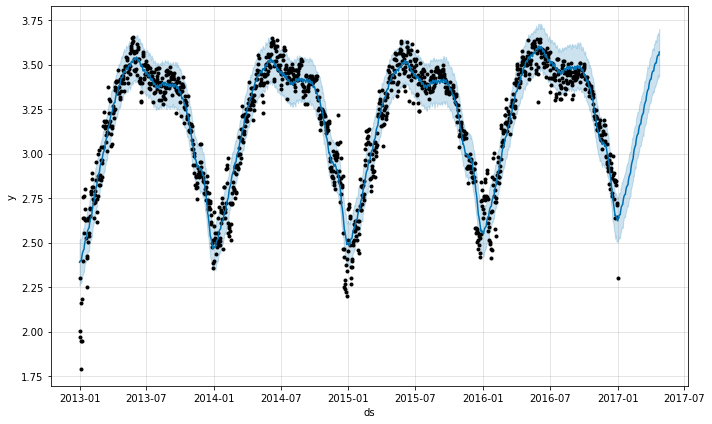

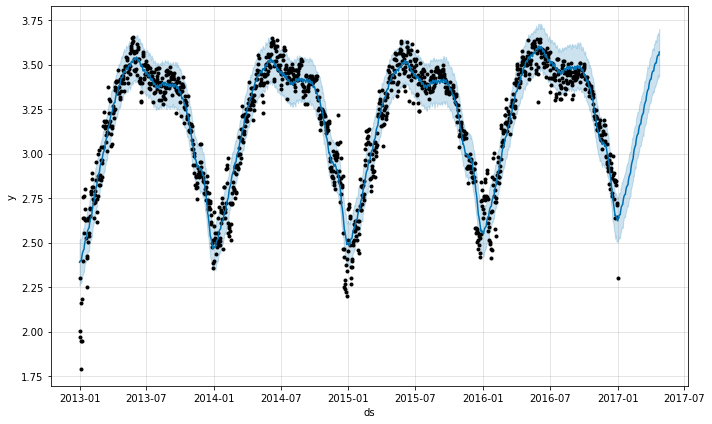

In [12]:
# Lets plot the forecasted data
model.plot(forecast_data)

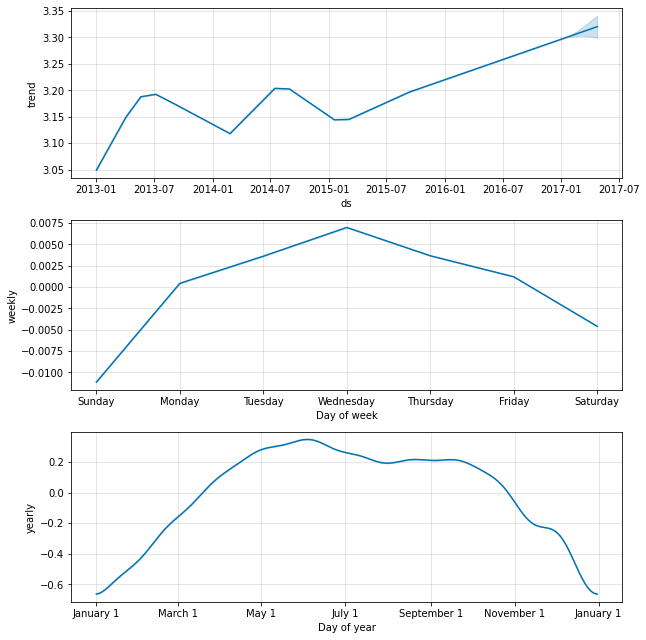

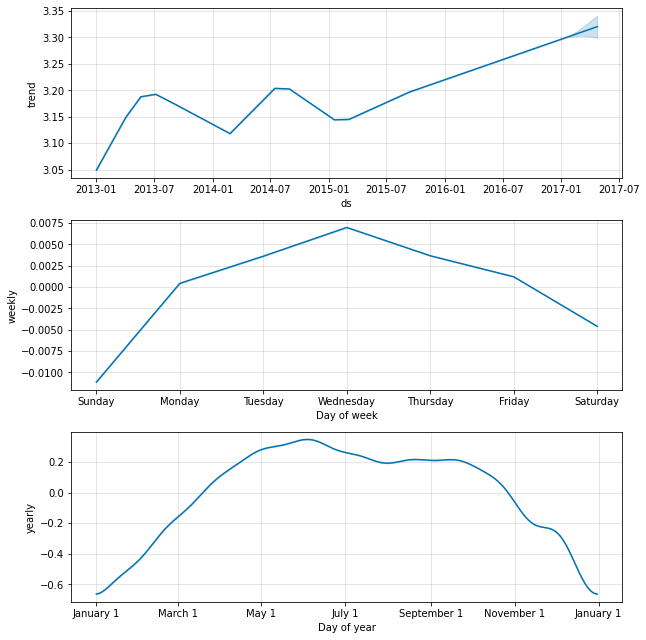

In [13]:
# Lets visualize each componenet(trend, seasonality)
model.plot_components(forecast_data)

In [14]:
# Lets save the original forecast data
forecast_data_orig = forecast_data
# Lets do the reverse transformations
forecast_data_orig["yhat"] = np.exp(forecast_data_orig["yhat"])
forecast_data_orig["yhat_lower"] = np.exp(forecast_data_orig["yhat_lower"])
forecast_data_orig["yhat_upper"] = np.exp(forecast_data_orig["yhat_upper"])

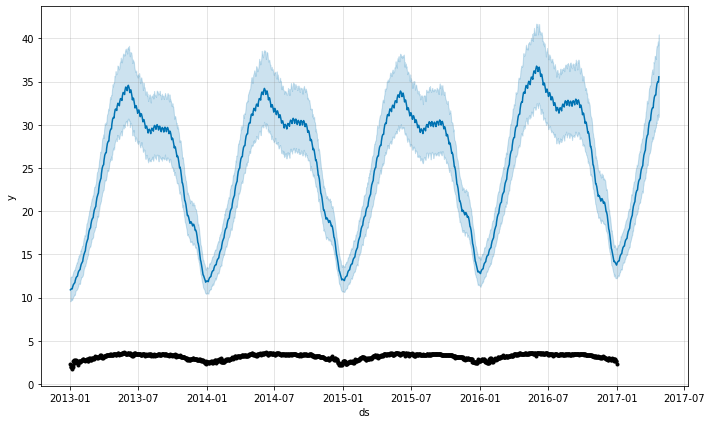

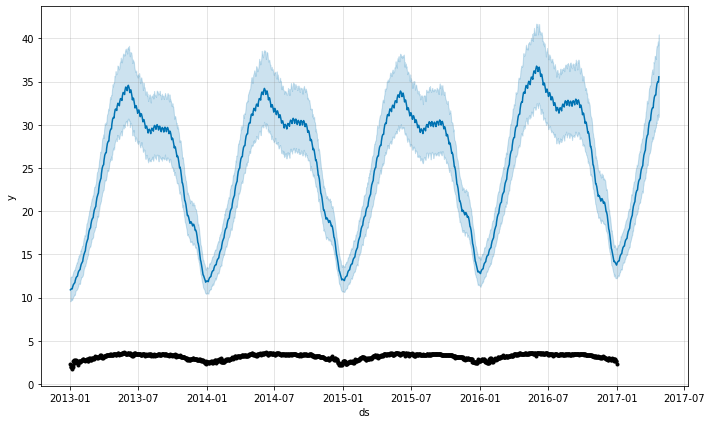

In [15]:
# Lets see the data now
model.plot(forecast_data_orig)

In [16]:
# Lets copy the log transformed data to another column
df_train["y_log"] = df_train["y"]
df_train["y"] = df_train["y_orig"]

In [18]:
final_df = pd.DataFrame(forecast_data_orig)
# Lets import plotly
import plotly.graph_objs as go
import plotly.offline as py
# Plotting predicted vs actual line graph with x = dates and y = outbound
actual_chart = go.Scatter(y = df_train["y_orig"], name = "Actual")
predicted_chart = go.Scatter(y = final_df["yhat"], name = "Predicted")
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predicted_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [19]:
# Lets see the test data
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [20]:
# Lets see our predicted data
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.296670,12.310488,15.761171,3.296670,3.296670,-0.661311,-0.661311,-0.661311,0.000412,0.000412,0.000412,-0.661723,-0.661723,-0.661723,0.0,0.0,0.0,13.948315
1463,2017-01-03,3.296879,12.388964,15.759260,3.296879,3.296879,-0.655232,-0.655232,-0.655232,0.003591,0.003591,0.003591,-0.658823,-0.658823,-0.658823,0.0,0.0,0.0,14.036310
1464,2017-01-04,3.297088,12.548536,15.957319,3.297088,3.297088,-0.647841,-0.647841,-0.647841,0.006958,0.006958,0.006958,-0.654799,-0.654799,-0.654799,0.0,0.0,0.0,14.143386
1465,2017-01-05,3.297298,12.582934,16.120011,3.297298,3.297298,-0.646137,-0.646137,-0.646137,0.003643,0.003643,0.003643,-0.649779,-0.649779,-0.649779,0.0,0.0,0.0,14.170484
1466,2017-01-06,3.297507,12.450260,16.031188,3.297507,3.297507,-0.642716,-0.642716,-0.642716,0.001182,0.001182,0.001182,-0.643898,-0.643898,-0.643898,0.0,0.0,0.0,14.222013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319275,31.154758,39.067182,3.299680,3.339178,0.231047,0.231047,0.231047,0.003643,0.003643,0.003643,0.227404,0.227404,0.227404,0.0,0.0,0.0,34.824522
1571,2017-04-21,3.319484,30.576828,39.577057,3.299621,3.339566,0.234599,0.234599,0.234599,0.001182,0.001182,0.001182,0.233417,0.233417,0.233417,0.0,0.0,0.0,34.955757
1572,2017-04-22,3.319694,31.250601,39.693439,3.299561,3.340010,0.234660,0.234660,0.234660,-0.004625,-0.004625,-0.004625,0.239285,0.239285,0.239285,0.0,0.0,0.0,34.965213
1573,2017-04-23,3.319903,30.868524,39.251869,3.299404,3.340435,0.233812,0.233812,0.233812,-0.011161,-0.011161,-0.011161,0.244973,0.244973,0.244973,0.0,0.0,0.0,34.942888


In [21]:
# Lets save it to a variable
rows = final_df["yhat"].tail(113)

In [22]:
# Converting into data frame
rows = rows.reset_index()

In [23]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

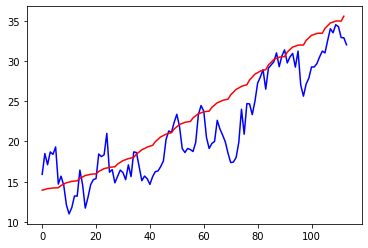

In [24]:
# plot
import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')   
plt.plot(rows, color='red')
plt.show()

### Multi-Variate Forecasting

In [25]:
# Loading the data
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [26]:
# Renaming the columns 
df_train = df_train.rename(columns = {"meantemp" : "y", "date" : "ds"})
# Saving a copy of the original data
df_train["y_orig"] = df_train["y"]
# Log transformation
df_train["y"] = np.log(df_train["y"])

In [27]:
# Instantiating the model
model_new = Prophet()
# Adding the independent features as regressors
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')
# Model training
model_new.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Future forecast
future_data = model_new.make_future_dataframe(periods = 113, freq = "D")

In [29]:
# Lets see the first five rows of the future data
future_data.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [30]:
df = df.append(df_test)
df = df.rename(columns = {"meantemp" : "y", "date" : "ds"})
future_data = df[["ds", "humidity", "wind_speed", "meanpressure"]]

In [31]:
# Lets see the first five rows
future_data.head()

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [32]:
# Forecast
forecast_data = model_new.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.573540,3.470616,3.683511
1572,2017-04-21,3.522061,3.401749,3.629164
1573,2017-04-22,3.518002,3.407664,3.624534
1574,2017-04-23,3.577531,3.465195,3.689254
1575,2017-04-24,3.588423,3.489268,3.703305


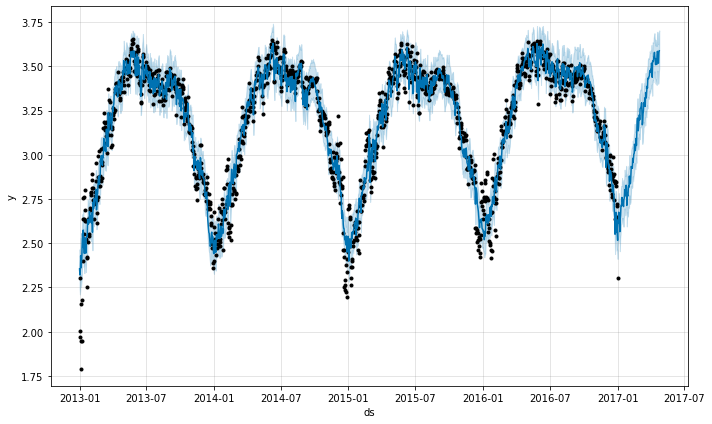

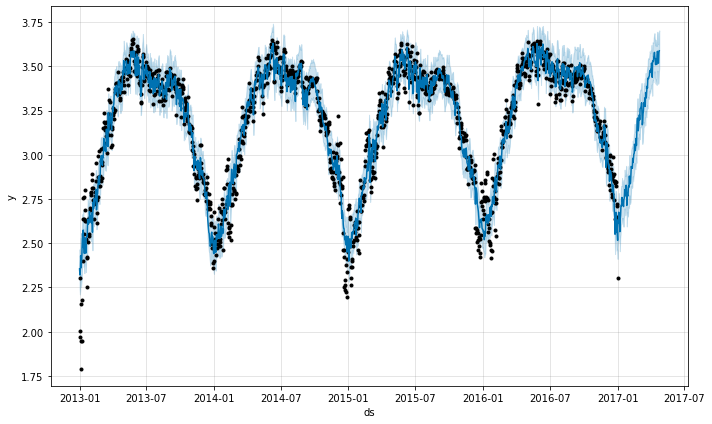

In [33]:
# Lets plot
model_new.plot(forecast_data)

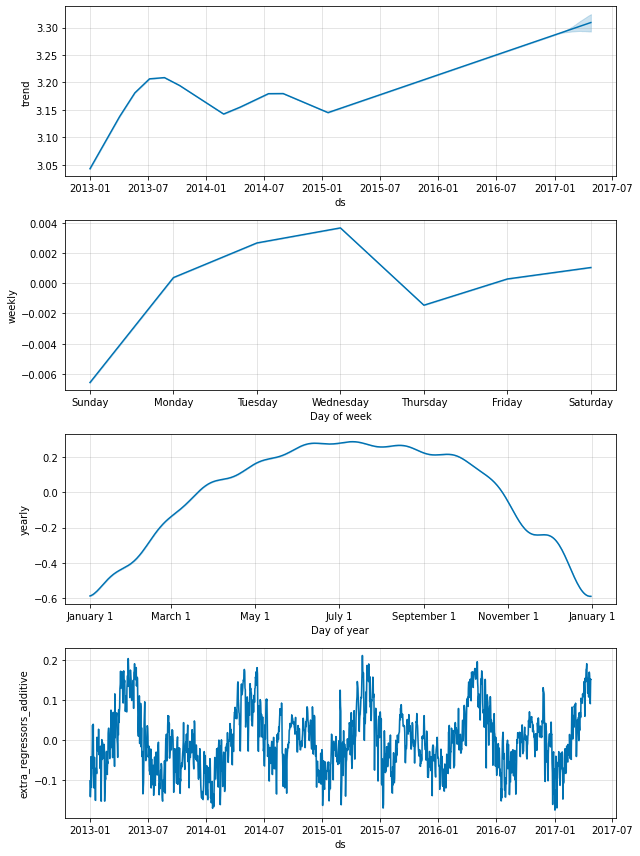

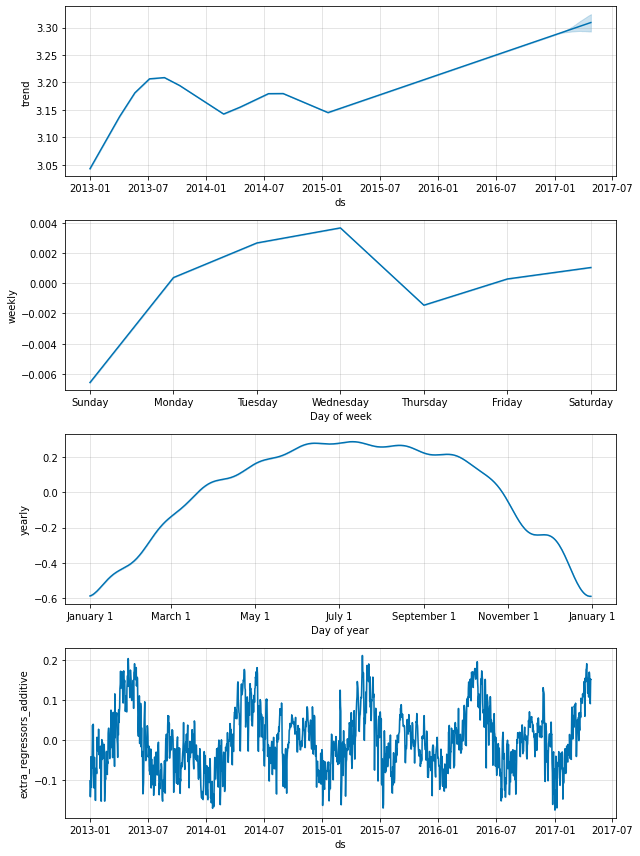

In [34]:
# Lets plot the components
model_new.plot_components(forecast_data)

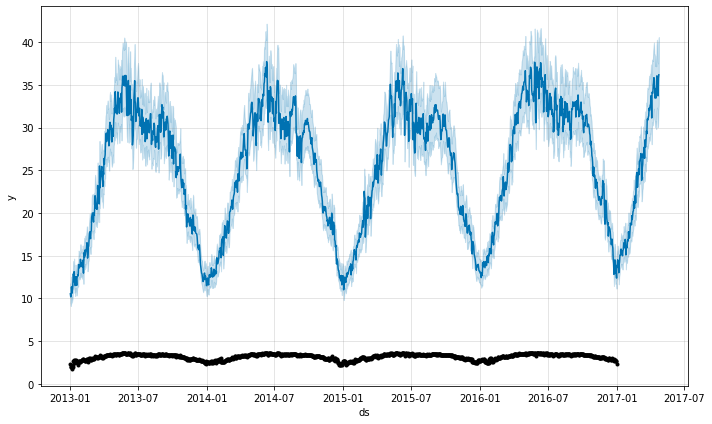

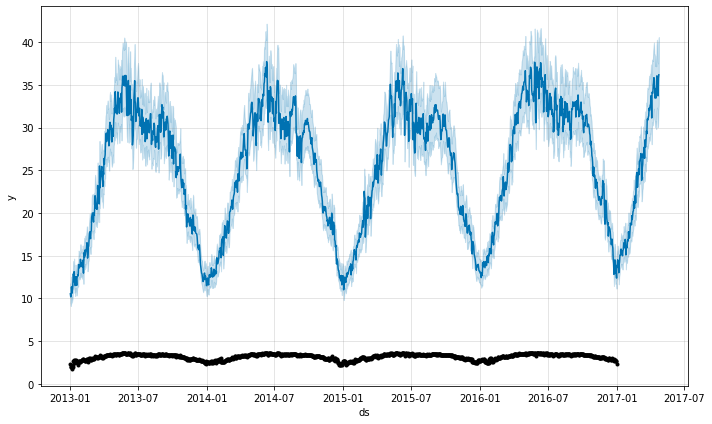

In [35]:
# Inverse transformations
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
# Plotting
model_new.plot(forecast_data_orig)

In [36]:
#copy the log-transformed data to another column
df_train['y_log']=df_train['y'] 
df_train['y']=df_train['y_orig']

In [37]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'